## Waste Segregation - Ali Akbar Khan

In [1]:
!pip install -Uqq fastai icrawler --use-deprecated=legacy-resolver

In [2]:
from icrawler import ImageDownloader
from icrawler.builtin import GoogleImageCrawler
from icrawler.builtin.google import GoogleFeeder, GoogleParser

class MyDownloader(ImageDownloader):
    def get_filename(self, task, default_ext):
        filename = super(MyDownloader, self).get_filename(task, default_ext)
        filename = filename.split(".")[0]
        return self.prefix + filename + ".png"

class MyCrawler(GoogleImageCrawler):
    def __init__(self, feeder_cls=GoogleFeeder, parser_cls=GoogleParser, downloader_cls=MyDownloader, prefix="", *args, **kwargs):
        super().__init__(feeder_cls, parser_cls, downloader_cls, *args, **kwargs)
        self.downloader.prefix = prefix

In [3]:
# We'll define a search_images function for the sake of ease

def search_images(term, max_images=30, folder_name="."):
    print(f"Searching for '{term}'")
    crawler = MyCrawler(
        prefix=term,
        storage={'root_dir': folder_name}, 
    )
    crawler.crawl(keyword=term, max_num=max_images)

In [ ]:
search_images("Plastic Waste", 2)

2025-08-06 21:04:09,259 - INFO - icrawler.crawler - start crawling...
2025-08-06 21:04:09,259 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-08-06 21:04:09,264 - INFO - feeder - thread feeder-001 exit
2025-08-06 21:04:09,281 - INFO - icrawler.crawler - starting 1 parser threads...
2025-08-06 21:04:09,288 - INFO - icrawler.crawler - starting 1 downloader threads...


Searching for 'Plastic Waste'


2025-08-06 21:04:11,018 - INFO - parser - parsing result page https://www.google.com/search?q=Plastic+Waste&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:04:23,299 - INFO - downloader - image #1	https://datatopics.worldbank.org/what-a-waste/img/v3_waste_disposal_site.jpg
2025-08-06 21:04:23,934 - INFO - downloader - image #2	https://assets.theoceancleanup.com/scaled/1200x675/app/uploads/2023/04/Large-220604_Guatemala_Helicopter_Val_S5_pic_324-scaled.jpg
2025-08-06 21:04:24,951 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to exit
2025-08-06 21:04:24,951 - INFO - downloader - thread downloader-001 exit
2025-08-06 21:04:25,310 - INFO - icrawler.crawler - Crawling task done!


2025-08-06 21:04:25,951 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2025-08-06 21:04:25,951 - INFO - parser - thread parser-001 exit


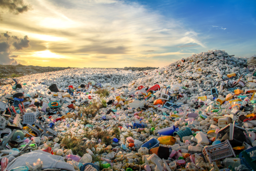

In [6]:
from fastai.vision.all import *
im = Image.open("Plastic Waste000001.png")
# icrawler names the downloaded photos from 000001 to 999999
im.to_thumb(256,256)

In [ ]:
search_images("Paper Waste", 1)

2025-08-06 21:06:00,971 - INFO - icrawler.crawler - start crawling...
2025-08-06 21:06:00,971 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-08-06 21:06:00,976 - INFO - feeder - thread feeder-001 exit
2025-08-06 21:06:00,986 - INFO - icrawler.crawler - starting 1 parser threads...
2025-08-06 21:06:00,991 - INFO - icrawler.crawler - starting 1 downloader threads...


Searching for 'Paper Waste'


2025-08-06 21:06:03,271 - INFO - parser - parsing result page https://www.google.com/search?q=Paper+Waste&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:06:04,795 - INFO - downloader - image #1	http://www.reelpaper.com/cdn/shop/articles/paper-waste-why-it-matters-how-to-reduce-it-the-reel-talk-313906_1024x1024.jpg
2025-08-06 21:06:06,346 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to exit
2025-08-06 21:06:06,346 - INFO - downloader - thread downloader-001 exit
2025-08-06 21:06:07,034 - INFO - icrawler.crawler - Crawling task done!


2025-08-06 21:06:07,445 - INFO - parser - downloaded image reached max num, thread parser-001 is ready to exit
2025-08-06 21:06:07,448 - INFO - parser - thread parser-001 exit


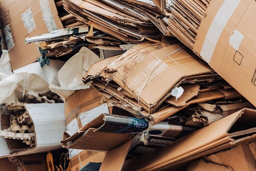

In [8]:
im = Image.open("Paper Waste000001.png")
im.to_thumb(256,256)

In [9]:
## !! IMPORTANT
# This represents the number of photos that'll be downloaded for each category.
# If you don't want to wait you can lower this number so less images will be downloaded.
# Having less images to train on may lead to worse neural network performance.
no_of_photos = 20 # Default is 20

searches = 'Electronic Waste','Biodegradable Waste','Plastic Waste','Paper Waste','Metal Waste'

path = Path('dataset')
from time import sleep

for o in searches:
    dest = (path/o)
    print(f'This is dest, {dest}')
    dest.mkdir(exist_ok=True, parents=True)
    search_images(f"{o} photo", no_of_photos, dest)
    sleep(10)  # Pause between searches to avoid over-loading server
    search_images(f"{o} sun photo", no_of_photos, dest)
    sleep(10)
    search_images(f"{o} night photo", no_of_photos, dest) 
    # Changed this to get "night photo" instead of "shade photo" since the original would cause paint tones to be downloaded 
    sleep(10)
    print(f"Photos of {o} completed!")

resize_images(path, max_size=400, dest=path, recurse=True)
print(f"Photos resized!")

This is dest, dataset\Electronic Waste


2025-08-06 21:08:57,228 - INFO - icrawler.crawler - start crawling...
2025-08-06 21:08:57,228 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-08-06 21:08:57,236 - INFO - feeder - thread feeder-001 exit
2025-08-06 21:08:57,239 - INFO - icrawler.crawler - starting 1 parser threads...
2025-08-06 21:08:57,243 - INFO - icrawler.crawler - starting 1 downloader threads...


Searching for 'Electronic Waste photo'


2025-08-06 21:08:59,476 - INFO - parser - parsing result page https://www.google.com/search?q=Electronic+Waste+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:09:03,193 - INFO - downloader - image #1	https://www.genevaenvironmentnetwork.org/wp-content/uploads/2020/09/ewaste-aspect-ratio-2000-1200-1024x614.jpg
2025-08-06 21:09:06,537 - INFO - downloader - image #2	https://images.theconversation.com/files/633396/original/file-20241120-17-i1sp0p.jpg
2025-08-06 21:09:09,155 - INFO - downloader - image #3	https://www.ecowatch.com/wp-content/uploads/2022/11/GettyImages-866313382-scaled.jpg
2025-08-06 21:09:14,532 - INFO - downloader - image #4	https://upload.wikimedia.org/wikipedia/commons/1/1d/Electronic_waste_at_Agbogbloshie%2C_Ghana.jpg
2025-08-06 21:09:15,677 - ERROR - downloader - Response status code 403, file https://recyclinginside.com/wp-content/uploads/2024/07/E-Waste_5_Ways_to_Boost_E-Recycling_and_Why_it_Matters-1024x644.jpg
2025-08-06 21:09:17,277 - INFO - downloader - image #5	

Searching for 'Electronic Waste sun photo'


2025-08-06 21:10:51,893 - INFO - parser - parsing result page https://www.google.com/search?q=Electronic+Waste+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:10:52,792 - INFO - downloader - image #1	https://static.vecteezy.com/system/resources/thumbnails/055/303/663/small_2x/pile-of-electronic-waste-polluting-the-environment-at-sunset-free-photo.jpg
2025-08-06 21:10:53,576 - INFO - downloader - image #2	https://thumbs.dreamstime.com/b/pile-electronic-waste-including-laptops-mobile-phones-sunset-scene-captures-environmental-impact-discarded-pile-363946168.jpg
2025-08-06 21:10:54,292 - INFO - downloader - image #3	https://images.stockcake.com/public/6/3/1/631d5c4b-5ef8-4f73-94e9-61bc067e37ba_large/electronic-waste-sunset-stockcake.jpg
2025-08-06 21:10:55,191 - INFO - downloader - image #4	https://thumbs.dreamstime.com/b/massive-pile-discarded-smartphones-reflecting-sunlight-symbolizes-electronic-waste-rapid-obsolescence-technology-ai-359915819.jpg
2025-08-06 21:10:55,381 - INFO - do

Searching for 'Electronic Waste night photo'


2025-08-06 21:12:57,501 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:12:58,301 - INFO - parser - parsing result page https://www.google.com/search?q=Electronic+Waste+night+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:13:00,497 - INFO - downloader - image #1	https://thumbs.dreamstime.com/b/electronic-waste-black-tone-background-126507533.jpg
2025-08-06 21:13:01,534 - INFO - downloader - image #2	https://thumbs.dreamstime.com/b/pile-discarded-electronic-waste-urban-alleyway-night-pile-discarded-electronic-waste-urban-alleyway-night-387918988.jpg
2025-08-06 21:13:02,334 - INFO - downloader - image #3	https://thumbs.dreamstime.com/b/up-close-view-large-heap-electronic-waste-focus-tangled-mass-monitors-gadgets-circuit-boards-textures-334724671.jpg
2025-08-06 21:13:04,249 - INFO - downloader - image #4	https://images.stockcake.com/public/5/e/d/5ed43943-cf48-4c02-9fef-c0e0fbfc7db9_large/towering-electronic-waste-stockcake.jpg
2025-08-06 21:13:14,918 

Photos of Electronic Waste completed!
This is dest, dataset\Biodegradable Waste
Searching for 'Biodegradable Waste photo'


2025-08-06 21:14:54,715 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:14:59,526 - INFO - parser - parsing result page https://www.google.com/search?q=Biodegradable+Waste+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:15:01,079 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/2159399067/photo/waste-and-leaves-in-the-compost-pile.jpg
2025-08-06 21:15:02,741 - INFO - downloader - image #1	https://thumbs.dreamstime.com/b/biodegradable-waste-consisting-leaves-fruit-white-surface-isolated-environmental-awareness-biodegradable-waste-365263256.jpg
2025-08-06 21:15:06,551 - INFO - downloader - image #2	https://environment.ec.europa.eu/sites/default/files/styles/oe_theme_medium_no_crop/public/2021-02/Biodegradable%20waste.jpg
2025-08-06 21:15:07,088 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/479440915/photo/compost-with-composted-earth.jpg
2025-08-06 21:15:50,066 - INFO - dow

Searching for 'Biodegradable Waste sun photo'


2025-08-06 21:18:00,034 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:18:05,047 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:18:06,163 - INFO - parser - parsing result page https://www.google.com/search?q=Biodegradable+Waste+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:18:36,688 - INFO - downloader - image #1	https://blog.didierstevens.com/wp-content/uploads/2022/09/20220907-150104.png
2025-08-06 21:18:43,336 - INFO - downloader - image #2	https://blog.didierstevens.com/wp-content/uploads/2022/09/20220907-150135.png
2025-08-06 21:18:44,848 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/2159399067/photo/waste-and-leaves-in-the-compost-pile.jpg
2025-08-06 21:18:53,738 - INFO - downloader - image #3	https://blog.didierstevens.com/wp-content/uploads/2022/09/20220907-150215.png
2025-08-06 21:19:09,725 - INFO - downloader - image #4	https://i0.wp.com/www.circularonlin

Searching for 'Biodegradable Waste night photo'


2025-08-06 21:20:52,200 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:20:52,413 - INFO - parser - parsing result page https://www.google.com/search?q=Biodegradable+Waste+night+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:21:00,697 - INFO - downloader - image #1	https://media.wired.com/photos/60be98e36ab4660c68b644e1/3:2/w_2560%2Cc_limit/Gear-Biodegradable-Phone-Case-1230188736.jpg
2025-08-06 21:21:03,176 - INFO - downloader - image #2	https://thumbs.dreamstime.com/b/recycling-bin-illuminated-urban-street-night-suitable-wide-range-uses-369395827.jpg
2025-08-06 21:21:06,707 - INFO - downloader - image #3	https://cdn.prod.website-files.com/6557c25edca57c772f97a283/656516e255e8c80e68837fdd_El_Dorado_Disposal_Compost.jpg
2025-08-06 21:21:09,304 - INFO - downloader - image #4	https://th-i.thgim.com/public/incoming/cwtgqw/article67498049.ece/alternates/LANDSCAPE_1200/Garbage%20burning%202.jpg
2025-08-06 21:21:15,765 - ERROR - downloader - Response sta

Photos of Biodegradable Waste completed!
This is dest, dataset\Plastic Waste
Searching for 'Plastic Waste photo'


2025-08-06 21:22:25,371 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:22:28,388 - INFO - parser - parsing result page https://www.google.com/search?q=Plastic+Waste+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:22:34,780 - INFO - downloader - image #1	https://spnews.com/downloads/4794/download/POD.jpg
2025-08-06 21:22:37,203 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/927987734/photo/recycling-plastic-in-junkyard.jpg
2025-08-06 21:22:38,658 - INFO - downloader - image #2	https://assets.theoceancleanup.com/scaled/1200x675/app/uploads/2023/04/Large-220604_Guatemala_Helicopter_Val_S5_pic_324-scaled.jpg
2025-08-06 21:23:13,046 - INFO - downloader - image #3	https://www.unisort.co.uk/app/uploads/plastic-bottle-waste.png
2025-08-06 21:23:16,144 - INFO - downloader - image #4	https://www.azocleantech.com/images/Article_Images/ImageForArticle_913(1).jpg
2025-08-06 21:23:17,526 - INFO - downloader - image #5	http

Searching for 'Plastic Waste sun photo'


2025-08-06 21:25:52,556 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:25:57,575 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:26:01,666 - INFO - parser - parsing result page https://www.google.com/search?q=Plastic+Waste+sun+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:26:04,082 - INFO - downloader - image #1	https://www.shutterstock.com/image-photo/plastic-waste-drought-barren-lands-260nw-2292748583.jpg
2025-08-06 21:26:05,783 - INFO - downloader - image #2	https://thumbs.dreamstime.com/b/pollution-waste-sunset-light-discarded-plastic-bottles-debris-littering-landscape-overshadowed-setting-sun-s-glow-326510371.jpg
2025-08-06 21:26:12,408 - ERROR - downloader - Response status code 400, file https://media.istockphoto.com/id/1363306608/photo/plastic-waste-in-nature.jpg
2025-08-06 21:26:17,417 - ERROR - downloader - Exception caught when downloading file https://thumbs.dreamstime.com/b/polluted-beach-plastic-

Searching for 'Plastic Waste night photo'


2025-08-06 21:28:42,216 - INFO - parser - parsing result page https://www.google.com/search?q=Plastic+Waste+night+photo&ijn=0&start=0&tbs=&tbm=isch
2025-08-06 21:28:43,057 - INFO - downloader - image #1	https://c8.alamy.com/comp/2FYMCXG/bangkok-thailand-may-26-2021-plastic-waste-is-lying-on-the-ground-an-polluting-a-street-in-bangkok-during-night-time-the-city-lights-shine-in-th-2FYMCXG.jpg
2025-08-06 21:28:44,239 - INFO - downloader - image #2	https://media.wired.com/photos/60be98e36ab4660c68b644e1/3:2/w_2560%2Cc_limit/Gear-Biodegradable-Phone-Case-1230188736.jpg
2025-08-06 21:28:44,860 - INFO - downloader - image #3	https://thumbs.dreamstime.com/b/concerning-scene-urban-waste-pollution-showing-garbage-littering-city-street-night-near-dumpster-urban-waste-376272115.jpg
2025-08-06 21:28:45,556 - INFO - downloader - image #4	https://thumbs.dreamstime.com/b/black-bag-bin-street-plastic-ao-nang-bay-krabi-thailand-night-time-54802578.jpg
2025-08-06 21:28:48,357 - INFO - downloader - image 

Photos of Plastic Waste completed!
This is dest, dataset\Paper Waste
Searching for 'Paper Waste photo'


2025-08-06 21:30:01,866 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:30:02,520 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Paper+Waste+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2025-08-06 21:30:06,883 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:30:11,896 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:30:12,879 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Paper+Waste+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out., remaining retry times: 1
2025-08-06 21:30:16,908 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:30:21,921 - INFO - downloader - downloader-001 is waiting for new d

Searching for 'Paper Waste sun photo'


2025-08-06 21:30:57,954 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:31:02,959 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:31:03,406 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Paper+Waste+sun+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out., remaining retry times: 2
2025-08-06 21:31:07,963 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:31:12,975 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:31:13,633 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Paper+Waste+sun+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
2025-08-06 21:31:17,988 - INFO - downloader - downloader-001 is waiting f

Searching for 'Paper Waste night photo'


2025-08-06 21:31:44,032 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:31:48,495 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Paper+Waste+night+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2025-08-06 21:31:49,042 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:31:54,056 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:31:55,355 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Paper+Waste+night+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
2025-08-06 21:31:59,059 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:32:04,066 - INFO - downloader - downlo

Photos of Paper Waste completed!
This is dest, dataset\Metal Waste
Searching for 'Metal Waste photo'


2025-08-06 21:32:25,062 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:32:27,400 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Metal+Waste+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2025-08-06 21:32:30,095 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:32:35,104 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:32:40,118 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:32:44,081 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Metal+Waste+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out., remaining retry times: 1
2025-08-06 21:32:45,129 - INFO - downloader - downloader-001 is waiting for new d

Searching for 'Metal Waste sun photo'


2025-08-06 21:33:11,165 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:33:16,169 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:33:17,967 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Metal+Waste+sun+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out., remaining retry times: 2
2025-08-06 21:33:21,185 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:33:23,894 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Metal+Waste+sun+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
2025-08-06 21:33:26,191 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:33:31,205 - INFO - downloader - downloader-001 is waiting f

Searching for 'Metal Waste night photo'


2025-08-06 21:37:23,403 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:37:28,431 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:37:29,513 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Metal+Waste+night+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out., remaining retry times: 2
2025-08-06 21:37:33,433 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:37:38,444 - INFO - downloader - downloader-001 is waiting for new download tasks
2025-08-06 21:37:38,705 - ERROR - parser - Exception caught when fetching page https://www.google.com/search?q=Metal+Waste+night+photo&ijn=0&start=0&tbs=&tbm=isch, error: HTTPSConnectionPool(host='www.google.com', port=443): Read timed out., remaining retry times: 1
2025-08-06 21:37:42,792 - INFO - parser - parsing result page https://www.google.com/s

Photos of Metal Waste completed!
Photos resized!


In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

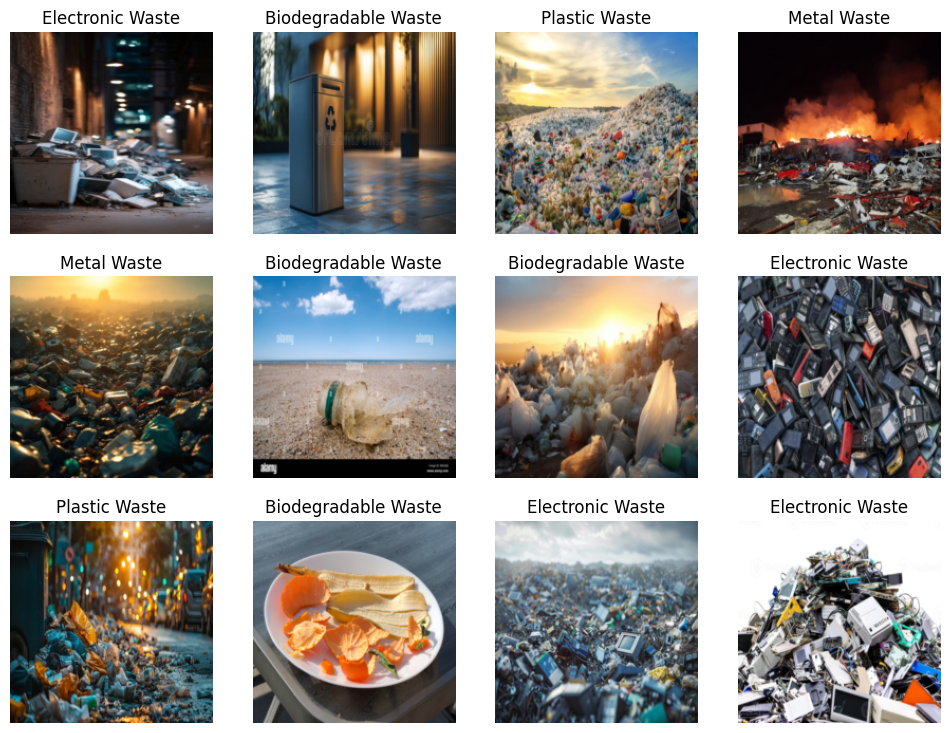

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.583234,1.584118,0.658537,00:13


epoch,train_loss,valid_loss,error_rate,time
0,1.450990,1.383153,0.512195,00:16
1,1.340579,1.220335,0.463415,00:16
2,1.093848,1.150144,0.317073,00:17
3,0.857834,1.128226,0.292683,00:16
4,0.672901,1.137687,0.268293,00:16
5,0.569032,1.177773,0.292683,00:16
6,0.482168,1.230667,0.341463,00:16
7,0.414515,1.249226,0.341463,00:16
8,0.354258,1.262852,0.341463,00:17
9,0.306493,1.269984,0.341463,00:16


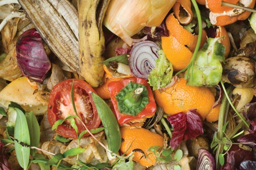

In [13]:
im = Image.open("C:/Users/unique/Documents/HorseBreeds.jpg")
im.to_thumb(256,256)

In [14]:
# Check for category index
classes = list(learn.dls.vocab)

print(classes)

['Biodegradable Waste', 'Electronic Waste', 'Metal Waste', 'Paper Waste', 'Plastic Waste']


In [15]:
predicted_class,_,probs = learn.predict(im)
# is_bird,_,probs = learn.predict(PILImage.create('forest000001.png'))
print(f"This is a: {predicted_class}.")
predicted_idx = classes.index(predicted_class)
# print(f"Probability it's a {predicted_class}: {probs[predicted_idx]:.4f}")
for idx, ele in enumerate(classes):
    print(f"Probability it's a {ele}: {probs[idx]:.4f}")

This is a: Biodegradable Waste.
Probability it's a Biodegradable Waste: 0.9966
Probability it's a Electronic Waste: 0.0001
Probability it's a Metal Waste: 0.0012
Probability it's a Paper Waste: 0.0018
Probability it's a Plastic Waste: 0.0002


In [16]:
#Export the model

learn.export('waste_segregation_model.pkl')